# Computer Vision con TensorFlow

## Introducción a Object Detection

La detección de objetos se compone de dos etapas:
- **Localización del objeto**: se define una frontera rectangular llamada **Bounding Box** alrededor del objeto a detectar.
- **Detección del objeto**: se clasifica el objeto, asignándole una etiqueta.

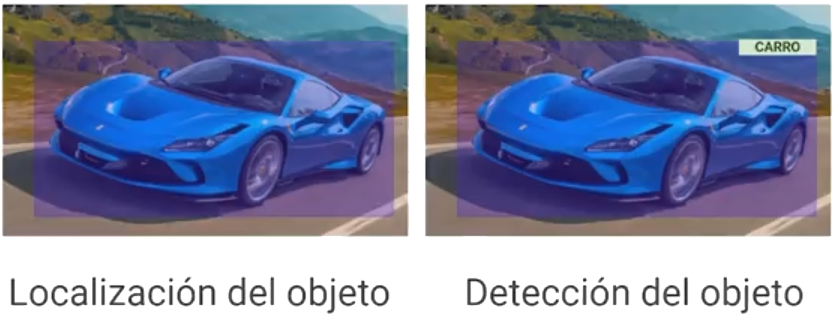

Para la detección de objetos se utiliza una arquitectura de Redes Neuronales Convolucionales a la que se le agrega las dos etapas de localización y detección.

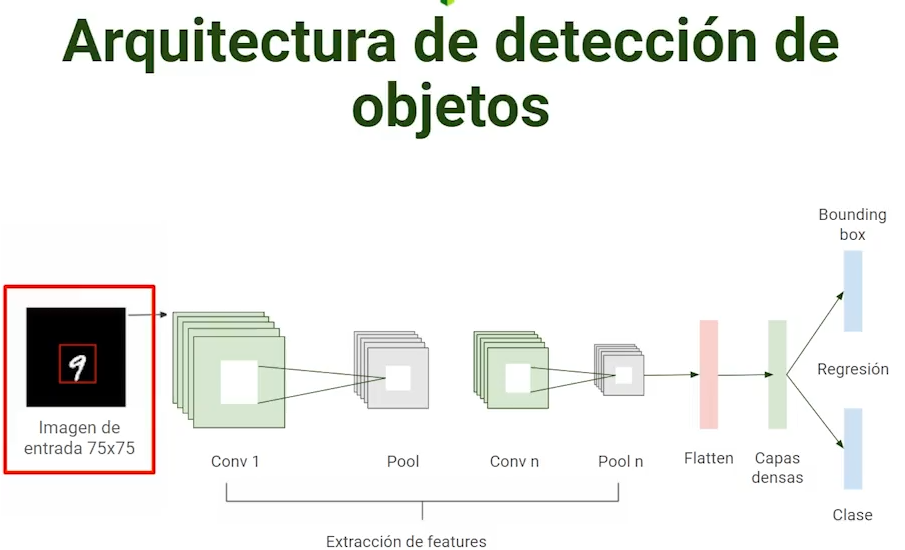

También se tiene una nueva métrica: **Intersección entre Uniones (IoU)** que se refiere a qué tanto se sobrepone la Bounding Box de la predicción y la Bounding Box real. Este valor está en el rango entre 0 y 1.

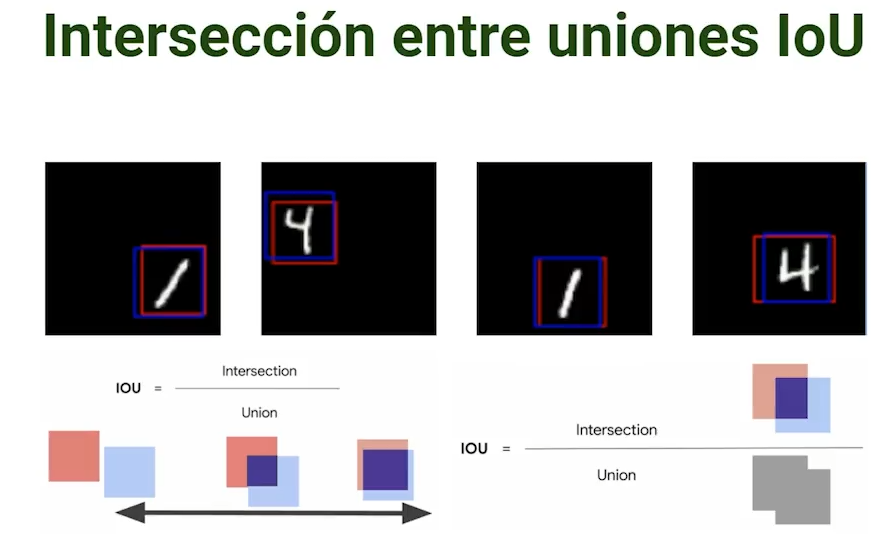

El algoritmo utiliza pequeñas ventanas o rectángulos (de cierto tamaño) los cuales van recorriendo toda la imagen y buscando si se encuentra algún objeto en dicha posición para generar una Bounding Box. Es necesario realizar una búsqueda selectiva para encontrar el tamaño de la Bounding Box correcto; para ello usamos **Non Maximum Supression (NMS)** el cual es una variable que define el umbral de IoU que define cuándo se debe considerar dos o más Bounding Boxes de un mismo objeto. Si una Bounding Box no supera el umbral, es descartada; de lo contrario, es almacenada. Al final, la Bounding Box elegida es aquella que tiene mayor IoU.

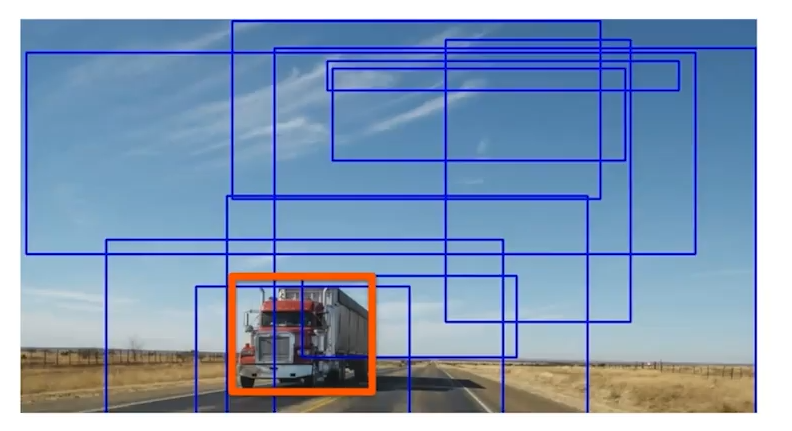
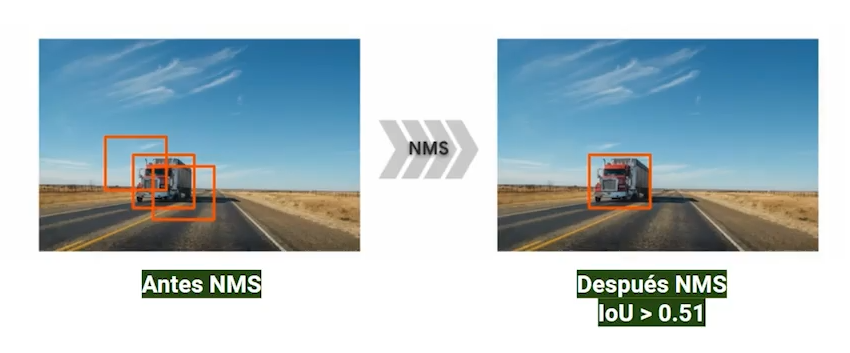

## Dimensionamiento de un proyecto de Visión Computarizada

### Identificar problemas

Los programadores de hoy deben tener una idea general de cómo identificar problemas, resolverlos, ponerlos en producción y monetizar.

Lo primero es "activar el chip de identificación de problemas":
1. Encontrar un problema y analizarlo.
2. Imaginarnos la solución perfecta, el escenario ideal, el resultado que buscamos.
3. Identificar y conocer a los usuarios, las personas afectadas por el problema y/o que se beneficiarían de la solución.

Es importante entender que **la solución NO siempre es tecnología.**

Ejemplo de caso de estudio:
- Problema: todos los días me toma alrededor de 2 horas para llegar a mi casa: congestión vehicular.
- Causa: no existen métricas en tiempo real que nos permitan monitorizar y analizar la distribución de vehículos en mi ciudad; no hay analítica en tiempo real.
- Solución: generar métricas en tiempo real a la ciudadanía para que se pueda modificar vías (en el largo plazo) y gestionar el flujo por las rutas (en el corto plazo).
- Viabilidad de la solución: las ciudades mexicanas pierden 94 mil millones de pesos (4.6 mil millones de USD) por el tráfico al año.

### Cómo definir los tiempos de un proyecto

Lo primero es entender que existen tiempos internos y tiempos externos.

Los **tiempos externos** son aquellos que dependen del entorno, por ejemplo, se requiere que un producto esté listo antes de navidad.

Los **tiempos internos** se definen a partir de la capacidad del equipo.

También es necesario definir el **alcance** del proyecto. Debemos categorizar las características del proyecto en:
- Must have (se debe tener): cosas o características que el producto necesita de forma obligatorio para el funcionamiento del mismo.
- Should have (debería tener): aquellas características secundarias que se deberían relegar para una segunda versión.
- Nice to hasve (sería bueno tener): características que son prescindibles y no agregan tanto valor a la solución por lo que deberían estar hasta el final de las prioridades.

### Cómo costear un proyecto

**Recomendaciones**
- No existe una única forma de costear.
- Crear tres escenarios: ideal, mediano, peor.
- Agregar a los tres escenarios un margen de falla.
- Agregar costos de servidores, herramientas externas.
- Dividir el proyecto en etapas, por ejemplo, entregas mensuales.
- Validar y firmar el alcance propuesto, ya que cambios representan costos adicionales.
- Analizar la metodología de cobro que mejor se adapta al producto.
- No tener miedo de cobrar.

### Roles necesarios

Los proyectos de Inteligencia Artificial siempre necesitan una persona experta en el tema, junto a un equipo de tecnología.

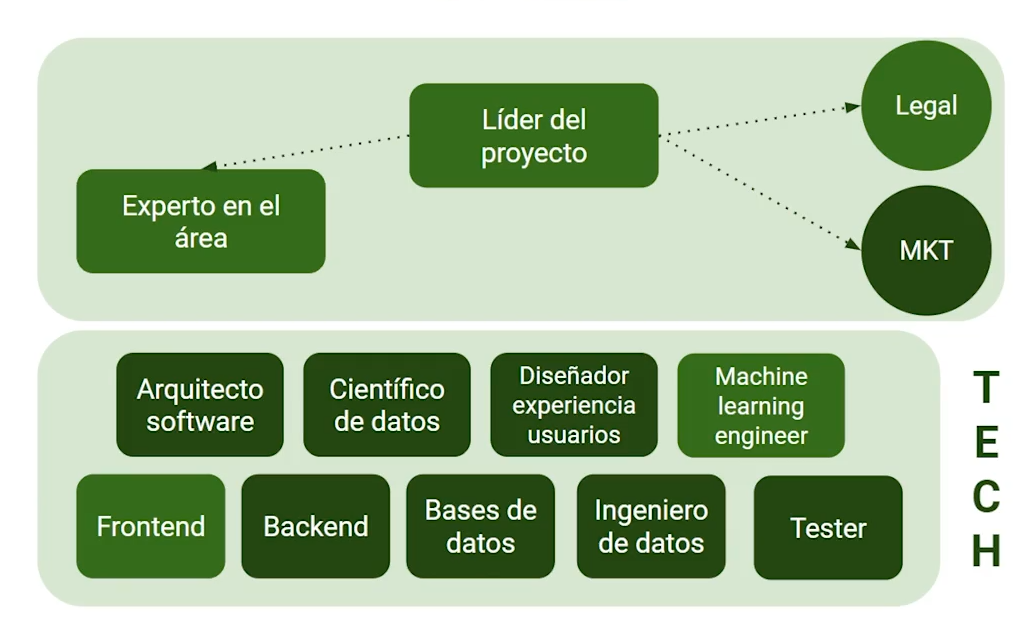

### Producto Mínimo Viable MVP

El concepto de producto Mínimo Viable sirve para evitar perder tiempo y dinero, definiendo las características mínimas para un proyecto.

- Try small.
- Fail fast.
- Fail cheap
- Fail forward.
- Don’t aim for perfection.

Es mejor tener versiones pequeñas entregables que realizar producciones de productos con más características porque:
- Una solución rápida es mejor que ninguna solución en un intervalo corto de tiempo.
- Permite una mejor comunicación con el cliente, después de cada versión ya se tienen pruebas y opiniones.

## Obtención y procesamiento de los datos

Es importante construir un dataset lo más general posible en el que se incluya la mayor cantidad de escenarios posibles.

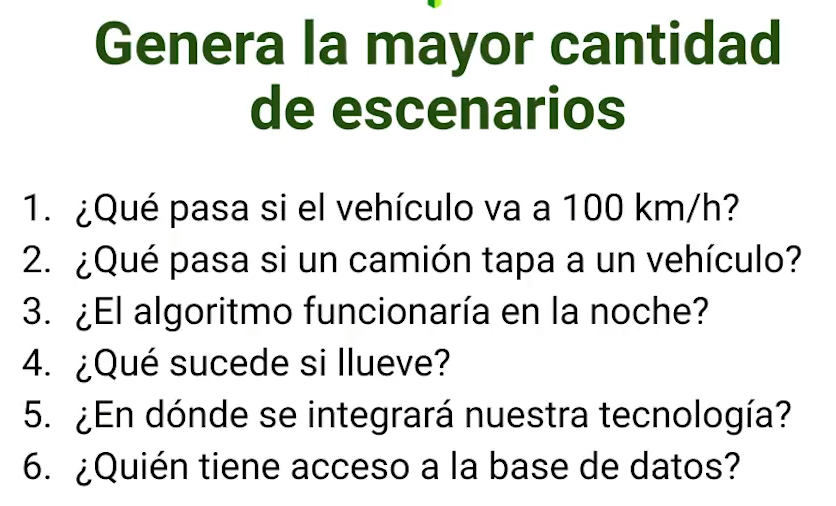

Es posible construir la base de datos de forma manual; construirla en conjunto con el cliente o incluso a partir de datasets de páginas como Kaggle. 

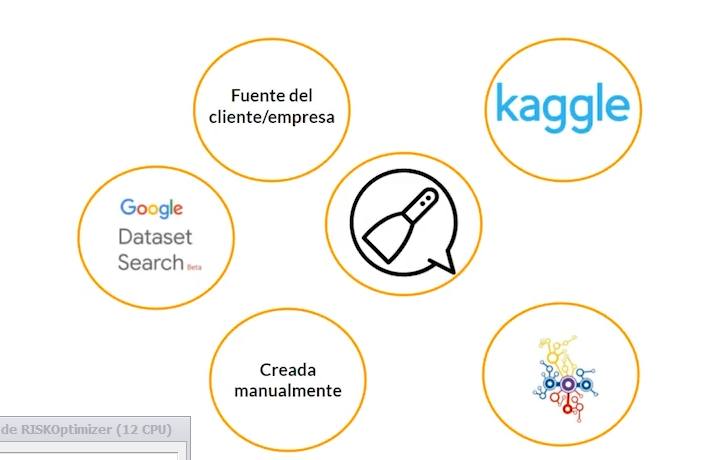

### Limpieza de la base de datos

Los datos son lo más importante al momento de llevar a cabo la creación de un modelo porque si tenemos malos datos, tendremos malos resultados. Es importante tomarse un tiempo para navegar a través de la base de datos y poder encontrar posibles datos duplicados, datos corruptos o datos nulos. 

Se recomienda realizar el proceso de selección y limpieza de los datos junto a un experto que tenga claro para qué se van a aplicar los datos y cuál es el resultado que se espera.

### Distribución de los datos

Como tenemos pocos datos entonces utilizaremos el 70% de las imágenes para training y el 30% para testing.

Lo primero es descomprimir las imágenes en una carpeta.

In [1]:
import os
import zipfile

localZip = "dataset_filtrado.zip"

# Creamos un objeto que tendrá la referencia a la ubicación del archivo y lo utilizará en modo lectura
zipRef = zipfile.ZipFile(localZip, "r")
# Extraemos los archivos en una nueva carpeta llamada dataset
zipRef.extractall("dataset")
# Cerramos el archivo
zipRef.close()

Ahora dividiremos las imágenes de forma aleatorio entre las carpetas de training y testing.

In [2]:
# Dirección de la carpeta con las imágenes
path = "dataset/dataset_filtrado"
# Lista que contiene los nombres de las imágenes
content = os.listdir(path)

In [5]:
# Dirección de la carpeta que contendrá los dos conjuntos
pathGeneral = "datasetFinal"
# Dirección de la carpeta con las imágenes de training
pathTrain = "{}/train".format(pathGeneral)
# Dirección de la carpeta con las imágenes de testing
pathTest = "{}/test".format(pathGeneral)

# Creamos los nuevos directorios
os.mkdir(pathGeneral)
os.mkdir(pathTrain)
os.mkdir(pathTest)

In [6]:
import random as rd
import shutil

train = 0.7

# Tomamos el 70% de las imágenes
for nCount in range(int(len(content) * train)):
    # Toma un valor de imagen de forma aleatoria
    randomChoiceImage = rd.choice(content)
    # Ruta de donde viene la imagen
    randomChoiceImageAbsolute = "{}/{}".format(path, randomChoiceImage)
    # Hacemos que la dirección a donde va la imagen sea la ubicación de la carpeta training más el nombre de la imagen
    targetImage = "{}/{}".format(pathTrain, randomChoiceImage)
    # Copiamos la imagen de un destino a otro
    shutil.copyfile(randomChoiceImageAbsolute, targetImage)
    # Eliminamos de la lista de imágenes la que acabamos de copiar
    content.remove(randomChoiceImage)
    

In [7]:
# Tomamos el resto de imágenes de la lista
for img in content:
    # Ruta de donde viene la imagen
    randomChoiceImageAbsolute = "{}/{}".format(path, img)
    # Ruta hacia donde va la imagen
    targetImage = "{}/{}".format(pathTest, img)
    # Copiamos la imagen de un destino a otro
    shutil.copyfile(randomChoiceImageAbsolute, targetImage)


### Etiquetado de los datos

Existen diversas plataformas o programas para realizar el etiquetado de los datos; la que utilizaremos será [**LinkedAI**](https://www.linkedai.co) ya que nos permite subir las imágenes en distintos datasets y etiquetar el contenido de las mismas en las categorías que necesitemos para luego exportar los resultados en formato JSON.

### Transformar los datos de JSON a TFRecord

TensorFlow creó el formato TFRecord el cual contiene en un único archivo las imágenes y las etiquetas.

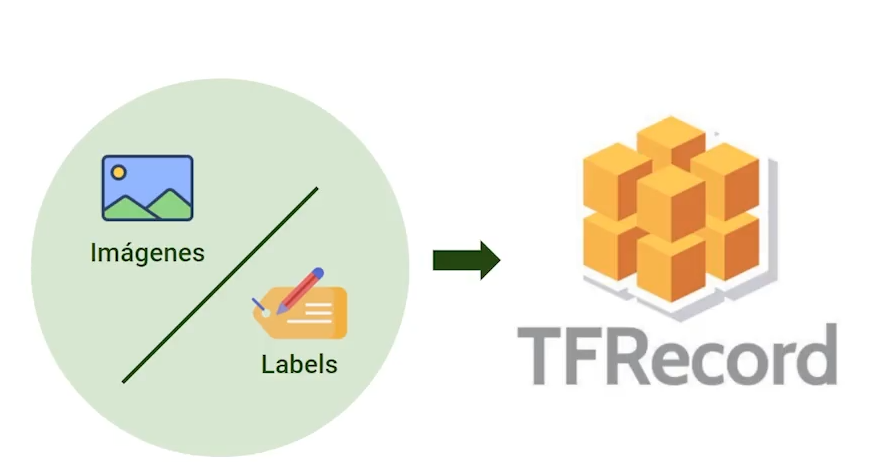

In [6]:
%pip install tf_slim numpy pandas 

  Using cached pandas-2.0.1-cp311-cp311-win_amd64.whl (10.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import json 
import pickle
import zipfile
import pandas as pd


[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 10.6/10.6 MB 7.5 MB/s eta 0:00:00
     ------------------------------------- 502.3/502.3 kB 10.5 MB/s eta 0:00:00
     ------------------------------------- 341.8/341.8 kB 10.7 MB/s eta 0:00:00
     --------------------------------------- 14.8/14.8 MB 11.7 MB/s eta 0:00:00


Un TFRecord está compuesto por el nombre, el cual hace referencia a la etiqueta; la configuración de X Y iniciales y X Y finales; la ruta donde está la imagen.

In [3]:
# Definimos el archivo con el que trabajaremos primero
typeFile = "train"
# Ruta del archivo
path = "datasetFinal/train/train.json"
# Abrimos el archivo
dataFile = open(path)
# Cargamos los datos
data = json.load(dataFile)

data

[{'id': 'd942f5bb-3014-4f84-92b3-e98b924e97b1b23dc190-0c31-4b4f-8ab0-fc26bb5e1b35',
  'image': 'cbb99fc122.jpg',
  'width': 780,
  'height': 440,
  'timestamp': 0,
  'segmentation_url': '',
  'classification': [],
  'skiped': False,
  'tags': [{'parent': None,
    'color': '#ec2237',
    'pos': {'x': 41.5, 'y': 86, 'w': 291, 'h': 265},
    'classes': [],
    'name': 'Moto',
    'id': '171052f3-9a88-48b8-a326-5d533bfb515e',
    'text': None,
    'type': 'bounding_box'},
   {'parent': None,
    'color': '#ec2237',
    'pos': {'x': 340.5, 'y': 50, 'w': 439.5, 'h': 389},
    'classes': [],
    'name': 'Moto',
    'id': 'a759af02-3bf9-4855-805b-62917356912f',
    'text': None,
    'type': 'bounding_box'},
   {'parent': None,
    'color': '#ec2237',
    'pos': {'x': 308.5, 'y': 0, 'w': 100, 'h': 54},
    'classes': [],
    'name': 'Moto',
    'id': '09a76d68-b0f1-4899-bee3-2386c8b72faa',
    'text': None,
    'type': 'bounding_box'},
   {'parent': None,
    'color': '#ec2237',
    'pos': {'x

Vamos a crear un CSV a partir del JSON con las variables relevantes. Más adelante convertiremos ese CSV a TFRecord.

In [8]:
# Lista que convertiremos a CSV
csvList = []

# Recorremos nuestro archivo JSON
for classification in data:
    # Ancho y alto de la imagen
    width, height = classification["width"], classification["height"]
    # Nombre de la imagen
    image = classification["image"]
    
    # Recorremos las tags para obtener las etiquetas y las bounding boxes
    for item in classification["tags"]:
        # Nombre de la clase o etiqueta
        name = item["name"] 
        # Posición inicial en X
        xmin = item["pos"]["x"]
        # Posición inicial en Y
        ymin = item["pos"]["y"]
        # Posición final en X
        xmax = xmin + item["pos"]["w"]
        # Posición final en Y
        ymax = ymin + item["pos"]["h"]
        
        # Agrupamos en una tupla los valores que acabamos de obtener; tiene que ser en este formato ya que así lo exige TFRecord
        value = (image, width, height, name, xmin, ymin, xmax, ymax)
        # Añadimos a la lista la tupla con los valores
        csvList.append(value)
    
# Nombre de las columnas que tendrá el archivo CSV
columnName = ["filename", "width", "height", "class", "xmin", "ymin", "xmax", "ymax"]
# Creamos el DataFrame
csvDf = pd.DataFrame(csvList, columns = columnName)
# Guardamos el df como CSV
csvDf.to_csv("datasetFinal/{}/{}Labels.csv".format(typeFile, typeFile))

Ahora hacemos lo mismo con test.

In [9]:
# Definimos el archivo con el que trabajaremos 
typeFile = "test"
# Ruta del archivo
path = "datasetFinal/test/test.json"
# Abrimos el archivo
dataFile = open(path)
# Cargamos los datos
data = json.load(dataFile)

# Lista que convertiremos a CSV
csvList = []

# Recorremos nuestro archivo JSON
for classification in data:
    # Ancho y alto de la imagen
    width, height = classification["width"], classification["height"]
    # Nombre de la imagen
    image = classification["image"]
    
    # Recorremos las tags para obtener las etiquetas y las bounding boxes
    for item in classification["tags"]:
        # Nombre de la clase o etiqueta
        name = item["name"] 
        # Posición inicial en X
        xmin = item["pos"]["x"]
        # Posición inicial en Y
        ymin = item["pos"]["y"]
        # Posición final en X
        xmax = xmin + item["pos"]["w"]
        # Posición final en Y
        ymax = ymin + item["pos"]["h"]
        
        # Agrupamos en una tupla los valores que acabamos de obtener; tiene que ser en este formato ya que así lo exige TFRecord
        value = (image, width, height, name, xmin, ymin, xmax, ymax)
        # Añadimos a la lista la tupla con los valores
        csvList.append(value)
    
# Nombre de las columnas que tendrá el archivo CSV
columnName = ["filename", "width", "height", "class", "xmin", "ymin", "xmax", "ymax"]
# Creamos el DataFrame
csvDf = pd.DataFrame(csvList, columns = columnName)
# Guardamos el df como CSV
csvDf.to_csv("datasetFinal/{}/{}Labels.csv".format(typeFile, typeFile))

### Transformar CSV a TFRecord

Ya tenemos los archivos en formato CSV y también en JSON, lo siguiente será convertirlos a TFRecord. Lo primero es instalar el paquete Object Detection.

In [10]:
%pip install tensorflow-object-detection-api

     -------------------------------------- 577.4/577.4 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.5/2.5 MB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 11.6 MB/s eta 0:00:00
     ------------------------------------- 988.1/988.1 kB 10.4 MB/s eta 0:00:00
     -------------------------------------- 420.6/420.6 kB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 64.5/64.5 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 163.0/163.0 kB ? eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.5 MB/s eta 0:00:00
     ----------------------

  DEPRECATION: wrapt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\alexg\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Ahora utilizamos el código proporcionado por [TensorFlow](https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/tensorflow-1.14/training.html) pero adaptándolo al proyecto.

In [1]:
%pip install tensorflow object_detection


[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl (1.9 kB)
     ---------------------------------------- 1.5/1.5 MB 2.6 MB/s eta 0:00:00
  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl (272.9 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.8.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.54.0-cp311-cp311-win_amd64.whl (4.1 MB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached Cython-0.29.34-py2.py3-none-any.whl (988 kB)
  Using cached contextlib2-21.6.0-py2.py3-none-any.whl (13 kB)
  Using cached lxml-4.9.2-cp311-cp311-win_amd64.whl (3.8 MB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached matpl

In [2]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

def class_text_to_int(row_label):
    if row_label == 'Carro':
        return 1
    elif row_label == 'Moto':
        return 2
    else: return None

def split(df, group):
    """ Create a namedtuple with the filename and all data related to cars 
    and/or motorcycles found on the picture"""
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)  # group DataFrame by filename
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    """ Create TFRecord files"""
    image  = tf.keras.utils.load_img(os.path.join(path, group.filename))
    width, height = image.size
    image_format = image.format.encode('utf8')
    image = tf.io.encode_jpeg(tf.keras.utils.img_to_array(image))

    filename = group.filename.encode('utf8')
    
    # check if the image format is matching with your images.
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(image.numpy()),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

Una vez hechas las modificaciones necesarias entonces procedemos a convertir el CSV de Train a TFRecord.

In [4]:
# Dirección para guardar el TFRecord
output_path = "datasetFinal/train/train.record"
# Ubicación de las imágenes
image_dir = "dataset/dataset_filtrado"
# Dirección del CSV
csv_input = "datasetFinal/train/trainLabels.csv"

writer = tf.io.TFRecordWriter(output_path)
path = os.path.join(image_dir)
examples = pd.read_csv(csv_input)
grouped = split(examples, 'filename')
for group in grouped:
    tf_example = create_tf_example(group, path)
    writer.write(tf_example.SerializeToString())

writer.close()
output_path = os.path.join(os.getcwd(), output_path)
print('Successfully created the TFRecords: {}'.format(output_path))

Successfully created the TFRecords: d:\DATA SCIENCE\Computer Vision\datasetFinal/train/train.record


Repetimos esto pero con el CSV de Test.

In [5]:
# Dirección para guardar el TFRecord
output_path = "datasetFinal/test/test.record"
# Ubicación de las imágenes
image_dir = "dataset/dataset_filtrado"
# Dirección del CSV
csv_input = "datasetFinal/test/testLabels.csv"

writer = tf.io.TFRecordWriter(output_path)
path = os.path.join(image_dir)
examples = pd.read_csv(csv_input)
grouped = split(examples, 'filename')
for group in grouped:
    tf_example = create_tf_example(group, path)
    writer.write(tf_example.SerializeToString())

writer.close()
output_path = os.path.join(os.getcwd(), output_path)
print('Successfully created the TFRecords: {}'.format(output_path))

Successfully created the TFRecords: d:\DATA SCIENCE\Computer Vision\datasetFinal/test/test.record


## Training, Testing y Optimización del modelo

El entrenamiento lo componen los siguientes elementos:

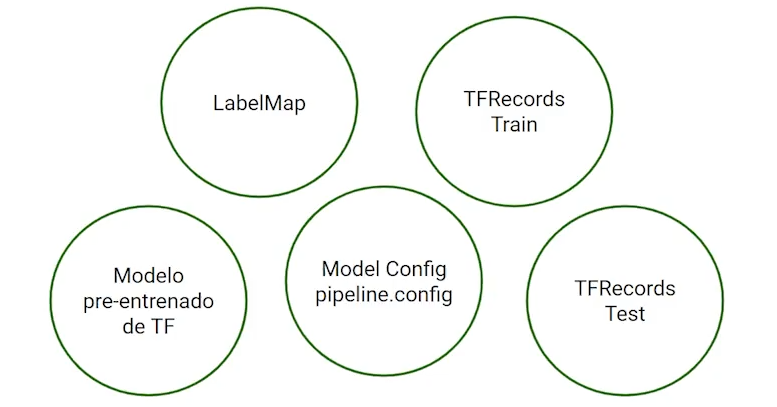

### Instalación e importación de las bibliotecas necesarias

In [15]:
!git clone https://github.com/tensorflow/models.git

!cd models/research
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install

Cloning into 'models'...
Updating files:  43% (1484/3393)
Updating files:  44% (1493/3393)
Updating files:  45% (1527/3393)
Updating files:  46% (1561/3393)
Updating files:  47% (1595/3393)
Updating files:  48% (1629/3393)
Updating files:  49% (1663/3393)
Updating files:  50% (1697/3393)
Updating files:  51% (1731/3393)
Updating files:  52% (1765/3393)
Updating files:  53% (1799/3393)
Updating files:  54% (1833/3393)
Updating files:  55% (1867/3393)
Updating files:  56% (1901/3393)
Updating files:  57% (1935/3393)
Updating files:  58% (1968/3393)
Updating files:  59% (2002/3393)
Updating files:  60% (2036/3393)
Updating files:  61% (2070/3393)
Updating files:  62% (2104/3393)
Updating files:  63% (2138/3393)
Updating files:  64% (2172/3393)
Updating files:  65% (2206/3393)
Updating files:  66% (2240/3393)
Updating files:  67% (2274/3393)
Updating files:  68% (2308/3393)
Updating files:  69% (2342/3393)
Updating files:  70% (2376/3393)
Updating files:  71% (2410/3393)
Updating files:  7

In [ ]:
%pip install cython
%pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI


In [14]:
%pip install avro-python3
%pip install 
%pip install tf_slim==1.1.0
%pip install tf-models-official==2.7.0
%pip install lvis
%pip install tensorflow_io==0.23.1
%pip install keras==2.7.0
%pip install opencv-python-headless==4.5.2.52

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/21.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/21.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/21.6 MB 1.4 MB/s eta 0:00:15
     ---------------------------------------- 0.2/21.6 MB 1.7 MB/s eta 0:00:13
      --------------------------------------- 0.3/21.6 MB 1.9 MB/s eta 0:00:12
      --------------------------------------- 0.4/21.6 MB 1.9 MB/s eta 0:00:12
     - -------------------------------------- 0.5/21.6 MB 2.0 MB/s eta 0:00:11
     - -------------------------------------- 0.7/21.6 MB 2.1 MB/s eta 0:00:10
     - -------------------------------------- 0.8/21.6 MB 2.3 MB/s eta 0:00:10
     - -------------------------------------- 1.0/21.6 MB 2.3 MB/s eta 0:00:09
     - -------------------

In [1]:
import os
import numpy as np
import pandas as pd
import json
import pickle
import zipfile
import shutil

Lo primero será crear una lista con las clases o etiquetas del proyecto.

In [16]:
labels = [
    {"name" : "Carro", "id" : 1},
    {"name" : "Moto", "id" : 2}
]

# Creamos un archivo .pbtxt donde guardar los labels
with open("labelMap.pbtxt", "w") as f:
    # Recorremos cada etiqueta en la lista y la ponemos en el archivo en un formato que ya está definido
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

### Modelo SSD MobileNet V2

Clonamos el modelo preentrenado que utilizaremos.

In [1]:
!wget --no-check-certificate http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz \
    -O tmp/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2023-04-26 14:28:44--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.30.208
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.30.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: 'tmp/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'

     0K .......... .......... .......... .......... ..........  0%  543K 37s
    50K .......... .......... .......... .......... ..........  0%  759K 31s
   100K .......... .......... .......... .......... ..........  0% 2,06M 24s
   150K .......... .......... .......... .......... ..........  0% 1,41M 21s
   200K .......... .......... .......... .......... ..........  1% 2,90M 18s
   250K .......... .......... .......... .......... ..........  1% 3,20M 16s
   300K .......... .......... .......... .......... ....

Ahora descomprimimos el archivo.

In [5]:
!tar -zxvf tmp/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
outputPath = "ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8"
outputPath = os.path.join(os.getcwd(), outputPath)
print("La carpeta se almaceno en {}".format(outputPath))

La carpeta se almaceno en d:\DATA SCIENCE\Computer Vision\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


Finalmente, definiremos la ruta donde se guardarán los resultados del modelo.

In [3]:
pathTraining = "ssdMobileNet"
os.mkdir(pathTraining)

FileExistsError: [WinError 183] No se puede crear un archivo que ya existe: 'ssdMobileNet'

### Configuración Pipeline

Comenzamos definiendo la ruta del archivo original de pipeline.config y el lugar donde almacenaremos la nueva configuración.

In [6]:
sourceConfig = "{}/pipeline.config".format(outputPath)
targetConfig = "{}/pipeline.config".format(pathTraining)

# Copiamos el archivo de Source a Target
shutil.copyfile(sourceConfig, targetConfig)

'ssdMobileNet/pipeline.config'

Visualizamos la configuración que trae el modelo por defecto.

In [10]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

# Obtenemos la configuración del archivo pipeline
config = config_util.get_configs_from_pipeline_file(targetConfig)

# Visualizamos la configuración base
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

Comenzamos a modificar la configuración.

In [11]:
# Creamos una variable proto_str para poder modificar las variables del archivo pbtxt
pipelineConfig = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(targetConfig, "r") as f:
  protoStr = f.read()
  text_format.Merge(protoStr, pipelineConfig)
  
pipelineConfig

model {
  ssd {
    num_classes: 90
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.009999999776482582
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0


In [12]:
# Definimos las rutas en donde se encuentra los TFRecords y el label map para agregarlos al archivo de configuración del pipeline.config
label_map_pbtxt_fname = "labelMap.pbtxt"
train_record_fname = "datasetFinal/train/train.record"
test_record_fname = "datasetFinal/test/test.record"

In [13]:
# Cantidad de clases del modelo
pipelineConfig.model.ssd.num_classes = 2

# El tamaño del batch size, entre más grande mas costo computacional va a necesitar en el proceso de entrenamiento, pero a su vez entrenara más rapido.
pipelineConfig.train_config.batch_size = 4

# Donde almacenaremos los resultados del entrenamiento
pipelineConfig.train_config.fine_tune_checkpoint ="{}/checkpoint/ckpt-0".format(outputPath)

# Qué tipo de detección aplicaremos (Object detection)
pipelineConfig.train_config.fine_tune_checkpoint_type = "detection"

# Dirección del label map
pipelineConfig.train_input_reader.label_map_path = label_map_pbtxt_fname

# Dirección del train TFRecord
pipelineConfig.train_input_reader.tf_record_input_reader.input_path[0] = train_record_fname

# Dirección del label map
pipelineConfig.eval_input_reader[0].label_map_path = label_map_pbtxt_fname

# Dirección del test TFRecord
pipelineConfig.eval_input_reader[0].tf_record_input_reader.input_path[0] = test_record_fname

# Visualizamos nuestro pipeline_config final.
pipelineConfig

model {
  ssd {
    num_classes: 2
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.009999999776482582
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
 

In [14]:
# Almacenamos nuestro archivo final
configText = text_format.MessageToString(pipelineConfig)
with tf.io.gfile.GFile(targetConfig, "wb") as f:
  f.write(configText)

### Entrenamiento del modelo

In [37]:
numSteps = 5000
modelDir = "/ssdMobileNet"

# Utilizamos directamente la libreria de object detection para ejecutar el script model_main_tf2
# Los argumentos principales son el archivo de configuración, la ubicación del modelo y la cantidad de steps que ejecutará.
!python models/research/object_detection/model_main_tf2.py \
--pipeline_config_path={targetConfig} \
--model_dir={modelDir} \
--num_train_steps={numSteps}

2023-04-26 17:30:12.964308: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-04-26 17:30:12.964503: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Traceback (most recent call last):
  File "d:\DATA SCIENCE\Computer Vision\models\research\object_detection\model_main_tf2.py", line 31, in <module>
    import model_lib_v2
  File "d:\DATA SCIENCE\Computer Vision\models\research\object_detection\model_lib_v2.py", line 30, in <module>
    from object_detection import inputs
  File "d:\anaconda3\envs\ComputerVision\lib\site-packages\object_detection\inputs.py", line 26, in <module>
    from object_detection.builders import model_builder
  File "d:\anaconda3\envs\ComputerVision\lib\site-packages\object_detection\builders\model_builder.py", line 25, in <module>
    from object_detection.builders import losses

### Análisis de los resultados con TensorBoard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir "/ssdMobileNet"

### Exportación del modelo

In [15]:
outputDirectory = "/fineTunedModel"

!python /models/research/object_detection/exporter_main_v2.py \
--input_type image_tensor \
--pipeline_config_path {targetConfig} \
--trained_checkpoint_dir {modelDir} \
--output_directory {outputDirectory}

python: can't open file 'd:\content\models\research\object_detection\exporter_main_v2.py': [Errno 2] No such file or directory


### Comprensión del modelo

In [ ]:
!zip -r /fineTunedModel.zip /content/fineTunedModel